In [214]:
#import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import quandl
import requests
from pandas.plotting import register_matplotlib_converters

from collections import defaultdict

import time

In [13]:
#store the API_KEY
quandl.ApiConfig.api_key = "tCBP9Fynn_czk4wgKip9"

In [14]:
API_KEY = "tCBP9Fynn_czk4wgKip9"

In [4]:
#definte the parameters in order to import the data correclty
parameters = {start_date : '2000-01-01',
             end_date: '2019-12-31',
             series_id: '6200'}

#import the data
SG = quandl.get_table('EDIA/ECD',
                        date = { 'gte': parameters[start_date], 'lte': parameters[end_date]},
                        series_id = parameters[series_id])

NameError: name 'start_date' is not defined

In [132]:
#reshape the table to get the date, and the corresponding values
table = pd.pivot_table(SG, index = 'date', values = 'value', columns = ['description'])

### Import the Data available for each country

In [108]:
overview = pd.read_csv('Data/Documentation/EDIA_ECD.csv', parse_dates = ['from_date', 'to_date'])
#calculate the timespan of the dataset
overview['timespan'] = overview['to_date'] - overview['from_date']

#group the dataframe according to country_code and indicator_code and then select the one with the largest timespan
overview = overview.groupby(['country_code', 'indicator_code'])
overview.tail()

,country_code,indicator_code,identifier,series_id,description,from_date,to_date,timespan
0,AD,43,AD.043.A.01,718,Andorra: Corporate Tax Rate [AD: Corporate Tax...,2017-01-01,2020-01-01,1095 days
1,AD,66,AD.066.A.01,719,Andorra: Export Prices [Andorra: Export unit v...,2000-01-01,2018-01-01,6575 days
2,AD,67,AD.067.A.01,720,Andorra: Exports [Andorra: Merchandise exports],2014-01-01,2014-01-01,0 days
3,AD,81,AD.081.1.A.01,721,Andorra: GDP (USD) [Andorra: National accounts...,1970-01-01,2018-01-01,17532 days
4,AD,81,AD.081.A.01,722,Andorra: GDP [Andorra: National accounts: Loca...,1970-01-01,2018-01-01,17532 days
...,...,...,...,...,...,...,...,...
43788,ZW,199,ZW.199.M.01,45838,Zimbabwe: Unemployment Change [Zimbabwe: Unemp...,1999-02-01,1999-12-01,303 days
43789,ZW,200,ZW.200.A.01,45839,Zimbabwe: Unemployment Rate [ZW: Unemployment:...,1991-01-01,2024-01-01,12053 days
43790,ZW,200,ZW.200.A.02,45840,Zimbabwe: Unemployment Rate [Zimbabwe: Nationa...,1982-01-01,2014-01-01,11688 days
43791,ZW,205,ZW.205.A.01,45841,Zimbabwe: Youth Unemployment Rate [ZW: Unemplo...,1991-01-01,2024-01-01,12053 days


In [229]:
#read in the dataframe with all the different indicators
overview = pd.read_csv('Data/Documentation/EDIA_ECD.csv', parse_dates = ['from_date', 'to_date'])

#calculate the timespan of the dataset
overview['timespan'] = overview['to_date'] - overview['from_date']

#get the index of the row with the biggest timespan
idx = overview.groupby(['country_code', 'indicator_code'])['timespan'].transform(max) == overview['timespan']

#filter the dataframe to only show the data series with the biggest timespan per indicator
overview = overview[idx]
#test it the filter was executed correctly
overview.tail()

,country_code,indicator_code,identifier,series_id,description,from_date,to_date,timespan
43782,ZW,197,ZW.197.A.01,45832,Zimbabwe: Tourist Arrivals [Zimbabwe: Internat...,1995-01-01,2018-01-01,8401 days
43784,ZW,198,ZW.198.A.01,45834,Zimbabwe: Unemployed Persons [ZW: Unemployment...,1991-01-01,2024-01-01,12053 days
43787,ZW,199,ZW.199.A.01,45837,Zimbabwe: Unemployment Change [ZW: Unemploymen...,1992-01-01,2024-01-01,11688 days
43789,ZW,200,ZW.200.A.01,45839,Zimbabwe: Unemployment Rate [ZW: Unemployment:...,1991-01-01,2024-01-01,12053 days
43791,ZW,205,ZW.205.A.01,45841,Zimbabwe: Youth Unemployment Rate [ZW: Unemplo...,1991-01-01,2024-01-01,12053 days


In [220]:
overview.head()

,country_code,indicator_code,identifier,series_id,description,from_date,to_date,timespan
0,AD,43,AD.043.A.01,718,Andorra: Corporate Tax Rate [AD: Corporate Tax...,2017-01-01,2020-01-01,1095 days
1,AD,66,AD.066.A.01,719,Andorra: Export Prices [Andorra: Export unit v...,2000-01-01,2018-01-01,6575 days
2,AD,67,AD.067.A.01,720,Andorra: Exports [Andorra: Merchandise exports],2014-01-01,2014-01-01,0 days
3,AD,81,AD.081.1.A.01,721,Andorra: GDP (USD) [Andorra: National accounts...,1970-01-01,2018-01-01,17532 days
4,AD,81,AD.081.A.01,722,Andorra: GDP [Andorra: National accounts: Loca...,1970-01-01,2018-01-01,17532 days


In [297]:
#create a dictionary from with the key country_code and the series_id as values
countries_indicator = overview[['country_code', 'indicator_code']]

#store the unique countries
countries = countries_indicator['country_code'].unique()

#create a defaultdict to store the series_id under the
countries_data = defaultdict()

#store the series_ids under every country
for i in countries:
    countries_data[i] = countries_indicator[countries_indicator['country_code'] == i]['indicator_code'].tolist()

In [221]:
%%time
series = {'ZW': ['45832','45834','45837','45839','45841'],
          'AD': ['718', '719', '720', '721', '722']
         }

#initiate a defaultdict to store the dataframes in a dictionary to be accessible by the key(series_id)
dataframes = defaultdict()

#create a dictionary with the series name and the respective data
for  key, value in series.items():
    test = pd.DataFrame()
    for i in range(len(value)):
        data = get_econ_data('1950-01-01', '2020-04-29', value[i])
        test = test.append(data)
        time.sleep(np.random.randint(10, size=1))
    dataframes[key] = test
    #time.sleep(10)

CPU times: user 341 ms, sys: 16.7 ms, total: 357 ms
Wall time: 56.8 s


In [216]:
CPU times: user 172 ms, sys: 8.85 ms, total: 181 ms
Wall time: 38.5 s


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs


,country_code,indicator_code,value
date,,,
2018-01-01,ZW,197,2580.00
2017-01-01,ZW,197,2423.00
2016-01-01,ZW,197,2168.00
2015-01-01,ZW,197,2057.00
2014-01-01,ZW,197,1880.00
...,...,...,...
1995-01-01,ZW,205,11.87
1994-01-01,ZW,205,10.61
1993-01-01,ZW,205,10.59


In [187]:
test = ['45839','45841']
df = pd.DataFrame()
for i in test:
    data = get_econ_data('2000-01-01', '2020-04-29', i)
    data.append(df)


""


In [199]:
test = pd.DataFrame()
data = get_econ_data('2000-01-01', '2020-04-29', '45839').reset_index()
data.head()

,date,country_code,indicator_code,value
0,2020-01-01,ZW,200,4.99
1,2019-01-01,ZW,200,4.95
2,2018-01-01,ZW,200,5.09
3,2017-01-01,ZW,200,5.17
4,2016-01-01,ZW,200,5.25


In [202]:
test = test.append(data)
test.head()

,date,country_code,indicator_code,value
0,2020-01-01,ZW,200,4.99
1,2019-01-01,ZW,200,4.95
2,2018-01-01,ZW,200,5.09
3,2017-01-01,ZW,200,5.17
4,2016-01-01,ZW,200,5.25


In [203]:
test.head()
data = get_econ_data('2000-01-01', '2020-04-29', '45841').reset_index()
test.append(data)

,date,country_code,indicator_code,value
0,2020-01-01,ZW,200,4.99
1,2019-01-01,ZW,200,4.95
2,2018-01-01,ZW,200,5.09
3,2017-01-01,ZW,200,5.17
4,2016-01-01,ZW,200,5.25
5,2015-01-01,ZW,200,5.30
6,2014-01-01,ZW,200,5.34
7,2013-01-01,ZW,200,5.40
8,2012-01-01,ZW,200,5.38
9,2011-01-01,ZW,200,5.37


In [172]:
dataframes['ZW']

,country_code,indicator_code,value


### Import Economic Data

In [15]:
#define the function to get the data series we want
def get_econ_data(start_date, end_date, series_id):
    """Download the economic data from the quandl database and reshape it for further use with datetime index"""
    data = quandl.get_table('EDIA/ECD', date = { 'gte': start_date, 'lte': end_date}, series_id = series_id)
    #data_reshaped = pd.pivot_table(data, index = 'date', values = ['value'], columns = ['country_code', 'indicator_code', 'description'])
    
    #drop the column not needed and set the date as column
    data_reshaped = data[['date', 'country_code', 'indicator_code', 'value']].set_index(['date'])
    return data_reshaped

###  indicators
- inflation rate
- balance of trade, 004
- government debt to gdp
- business confidence
- manufacturing PMI
- servies PMI
- consumer confidence, 031
- retail sales MoM, 181
- government debt, 102
- Government Debt To GDP, 103
- Money Supply M0, 146
- Money Supply M1, 147
- Money Supply M2, 148
- Money Supply M3, 149
- unemployment change, 198
- unemployment rate, 200
- Government Revenues, 105
- Government Spending, 106
- Corporate Tax Rate, 043
- Personal Income Tax Rate, 167
- Deposit Interest Rate, 55
- Central Bank Interest Rate, 124

#### Import Data for Brazil

In [54]:
#import several dataframes
#create a dictionary for the DF for Brazil:
df_brazil = {'CPI': '5218',
             'Trade_Balance': '5185',
             'Government_Debt_to_GDP': '5347',
             'Business_Confidence_Manufacturing': '5193',
             'Manufacturing_Production': '5414',
             'Consumer_Confidence': '5213',
             'Retail_Sales': '5449',
             'Money_Supply_M1': '5419',
             'Unemployment_rate': '5478',
             'Youth_Unemployment_rate': '5485',
             'Personal_Income_Tax': '5429',
             'Corporate_Tax_Rate': '5221',
             'Deposit_Interest_Rate': '5241',
             'CB_Interest_Rate': '5398'
            }

#initiate a defaultdict to store the dataframes in a dictionary to be accessible by the key(series_id)
data_brazil = defaultdict()

#create a dictionary with the series name and the respective data
for  key, value in df_brazil.items():
    data_brazil[key] = get_econ_data('2000-01-01', '2020-04-29', value)
    print(data_brazil[key].shape)

(243, 3)
(243, 3)
(11, 3)
(243, 3)
(218, 3)
(243, 3)
(242, 3)
(243, 3)
(96, 3)
(18, 3)
(18, 3)
(18, 3)
(243, 3)
(243, 3)


In [56]:
data_brazil['CB_Interest_Rate'].head()

,country_code,indicator_code,value
date,,,
2020-03-01,BR,124,3.75
2020-02-01,BR,124,4.25
2020-01-01,BR,124,4.50
2019-12-01,BR,124,4.50
2019-11-01,BR,124,5.00


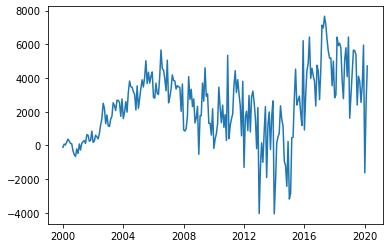

In [63]:
plt.plot(data_brazil['Trade_Balance']['value'], label = 'Trade_Balance')
plt.show()

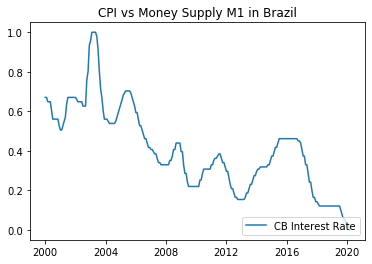

In [80]:
#plt.plot(normalize(data_brazil['Money_Supply_M1']['value']), label = 'Money Supply M1')
#plt.plot(normalize(data_brazil['CPI']['value']), label = 'Consumer Price Index')
plt.plot(normalize(data_brazil['CB_Interest_Rate']['value']), label = 'CB Interest Rate')
#plt.plot(normalize(data_brazil['Trade_Balance']['value']), label = 'Trade_Balance')
plt.title('CPI vs Money Supply M1 in Brazil')
plt.legend(loc = 'lower right')
plt.show()

#### Import Data for United States

In [181]:
from functools import reduce

#merge the timeseries of a country into one dataframe
dfs = [frames['6500'], frames['6550'], frames['6600']]
cambodia  = reduce(lambda left,right: pd.merge(left, right, on='date'), dfs)

### Import USD/BRL Exchange Rate

In [76]:
#source of the USD/BRL Exchange Rate is Yahoo Finance
BRL_USD = pd.read_csv('Data/Currencies/USDBRL.csv', parse_dates = ['Date'], index_col = ['Date'])

In [77]:
BRL_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,2.946,2.948,2.923,2.934,2.934,0.0
2003-12-08,2.934,2.945,2.931,2.935,2.935,0.0
2003-12-15,2.935,2.943,2.918,2.923,2.923,0.0
2003-12-22,2.923,2.928,2.805,2.901,2.901,0.0
2003-12-29,2.901,2.908,2.860,2.876,2.876,0.0


In [67]:
big_mac_price_BRA = quandl.get('ECONOMIST/BIGMAC_BRA')

In [78]:
big_mac_price_BRA.head()

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,2.95,1.79,1.65,1.175299,-34.340849,NaN,NaN,NaN,NaN,NaN
2001-04-30,3.60,2.19,1.64,1.417323,-35.282062,NaN,NaN,NaN,NaN,NaN
2002-04-30,3.60,2.34,1.55,1.445783,-38.214396,NaN,NaN,NaN,NaN,NaN
2003-04-30,4.55,3.07,1.44,1.678967,-45.310528,NaN,NaN,NaN,NaN,NaN
2004-05-31,5.40,3.18,1.70,1.862069,-41.444372,NaN,NaN,NaN,NaN,NaN


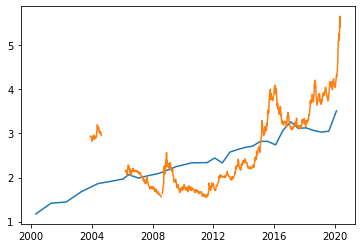

In [105]:
plt.plot(big_mac_price_BRA['dollar_ppp'])
plt.plot(BRL_USD['Close'])
plt.show()

### Exploratory Analysis

In [208]:
cambodia.describe()

description,Cambodia: Fiscal Expenditure [KH: Government Expenditure],Cambodia: Government Budget [Cambodia: Government finance: Deficit & financing: Net lending (+) / net borrowing (-)],Cambodia: Money Supply M1 [Cambodia: Money (Natl Definitions): M1]
count,10.000000,1.000000e+01,1.000000e+01
mean,461.278000,-1.095195e+06,4.400790e+06
std,166.363264,7.703464e+05,1.840569e+06
min,190.500000,-2.376416e+06,2.133838e+06
25%,339.315000,-1.672170e+06,3.107627e+06
50%,467.810000,-9.006265e+05,4.042001e+06
75%,609.327500,-4.622352e+05,5.983358e+06
max,673.520000,-1.292850e+05,7.336712e+06


In [188]:
cambodia.index

DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [207]:
x = cambodia.index
fig = go.Figure()
fig.add_scatter(x=x, y=cambodia.iloc[:,1], mode = 'lines+markers', line_color = 'orange', name = cambodia.columns[0])
fig.add_scatter(x=x, y=cambodia.iloc[:,2], mode = 'lines+markers', line_color = 'white', name = cambodia.columns[1])

#define the chart look
fig.update_layout(width = 1000,
                  height = 600,
                  plot_bgcolor = 'rgb(10,10,10)',
                  title = {
                      'text': "Plot Title",
                      'y':0.9,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                  xaxis_title = "Date",
                  yaxis_title = "Value",
                  font = dict(
                      family = "Helvetica Neue, Bold",
                      size = 18,
                      color = "#7f7f7f")
                  )
fig.show()

Text(0, 0.5, 'Dollar Amount')

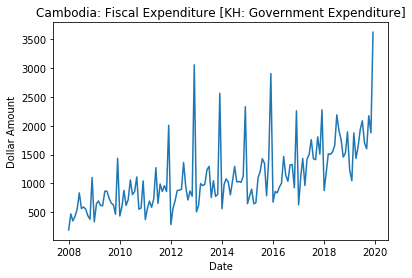

In [171]:
plt.plot(frames['6500'])
plt.title(frames['6500'].columns[0])
plt.xlabel('Date')
plt.ylabel('Dollar Amount')

In [83]:
#df = px.data.gapminder().query("continent=='Oceania'")
x = SG['date']
y = SG['value']
fig = go.Figure(go.Scatter(x = x, y = y, mode = 'lines+markers', line_color = 'orange'))

#define the chart look
fig.update_layout(width = 1000,
                  height = 600,
                  plot_bgcolor = 'rgb(10,10,10)',
                  title = {
                      'text': "Plot Title",
                      'y':0.9,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top'},
                  xaxis_title = "Date",
                  yaxis_title = "Value",
                  font = dict(
                      family = "Helvetica Neue, Bold",
                      size = 18,
                      color = "#7f7f7f")
                  )
#configure the appearance of the bar
config = {'displaylogo': False}
fig.show(config=config)

In [4]:
#import stock market data
ibovespa = pd.read_csv('Data/BVSP.csv', parse_dates = ['Date'])

In [5]:
ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852 entries, 0 to 6851
Data columns (total 7 columns):
Date         6852 non-null datetime64[ns]
Open         6674 non-null float64
High         6674 non-null float64
Low          6674 non-null float64
Close        6674 non-null float64
Adj Close    6674 non-null float64
Volume       6674 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 374.8 KB


### Import Economic Values

In [83]:
#import the data using the quandl package, 
# Each dataset in this database has a Quandl code of the following formats: WWDI/{COUNTRY}_{INDICATOR}
economic_data_brasil = quandl.get('BCB/188', start_date='2000-01-01', end_date='2020-04-18')
economic_data_switzerland = quandl.get('SNB/CAPCHSTOCKI', start_date='2000-01-01', end_date='2020-04-18')
economic_data_US = quandl.get('FED/FA364122005_Q', start_date='2000-01-01', end_date='2020-04-18')

snb_balance_sheet = quandl.get('SNB/snbbipo', start_date='2000-01-01', end_date='2020-04-18')
swiss_stock_market = quandl.get('SNB/capchstocki', start_date='2000-01-01', end_date='2020-04-18')
swiss_monetary_supply = quandl.get('SNB/SNBMONAGG', start_date='2000-01-01', end_date='2020-04-18')
US_money_supply = quandl.get('FED/M1_N_M', start_date='1970-01-01', end_date='2020-04-18')
US_GDP = quandl.get('FED/FA086902001_Q', start_date='1970-01-01', end_date='2020-04-18')


In [73]:
gold_price = pd.read_csv('Data/Gold_daily.csv', parse_dates = ['Date'], index_col = ['Date'])

In [98]:
quandl.ApiConfig.api_key = 'tCBP9Fynn_czk4wgKip9'
test = quandl.get('EDIA/ECD', start_date='2019-09-01', end_date ='2019-07-01', series_id='43961,43960')

NotFoundError: (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.

In [95]:
test

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,43961,US,200,US.200.M.03,United States: Unemployment Rate [United State...,%,M,2019-09-01,3.5
1,43961,US,200,US.200.M.03,United States: Unemployment Rate [United State...,%,M,2019-07-01,3.7
2,43960,US,200,US.200.M.02,United States: Unemployment Rate [Unemployment...,%,M,2019-09-01,3.5
3,43960,US,200,US.200.M.02,United States: Unemployment Rate [Unemployment...,%,M,2019-07-01,3.7


In [75]:
gold_vs_money = gold_price.merge(US_money_supply, on = 'Date', suffixes=('_gold', '_money_supply'))
gold_vs_money = gold_vs_money.sort_index()

In [81]:
gold_vs_money

,Value_gold,Value_money_supply
Date,,
1979-01-31,233.70,363.3
1979-02-28,251.30,351.7
1979-04-30,245.30,371.3
1979-05-31,274.60,362.2
1979-07-31,296.45,378.4
...,...,...
2019-07-31,1427.55,3860.8
2019-09-30,1485.30,3874.6
2019-10-31,1510.95,3921.9


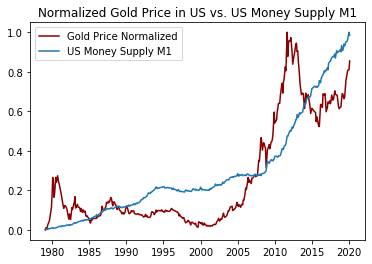

In [82]:
plt.plot(normalize(gold_vs_money['Value_gold']), label = 'Gold Price Normalized', color = '#8B0000')
plt.plot(normalize(gold_vs_money['Value_money_supply']), label = "US Money Supply M1")
plt.title('Normalized Gold Price in US vs. US Money Supply M1')
plt.legend()

In [37]:
gold_price.tail()

,Date,Value
10782,1971-01-01,37.4
10783,1970-10-01,36.2
10784,1970-07-01,35.4
10785,1970-04-01,35.1
10786,1970-01-01,35.2


In [10]:
economic_data_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5096 entries, 2000-01-04 to 2020-03-13
Data columns (total 9 columns):
SPI Swiss Performance Index - Index total (including dividend reinvestment)    5087 non-null float64
SPI Swiss Performance Index - Banks                                            4949 non-null float64
SPI Swiss Performance Index - Financial services                               4949 non-null float64
SPI Swiss Performance Index - Insurance                                        4949 non-null float64
SPI Swiss Performance Index - Food and beverages                               4949 non-null float64
SPI Swiss Performance Index - Health care                                      4949 non-null float64
SPI Swiss Performance Index - Registered shares                                5086 non-null float64
SPI Swiss Performance Index - Bearer shares and participation certificates     5086 non-null float64
SMI Swiss Market Index (excluding dividend reinvestment)            

In [30]:
swiss_monetary_supply.tail()

,Level - Currency in circulation,Level - Sight deposits,Level - Deposits in transaction accounts,Level - Monetary aggregate M1,Level - Savings deposits,Level - Monetary aggregate M2,Level - Time deposits,Level - Monetary aggregate M3,Change from the corresponding month of the previous year - Currency in circulation,Change from the corresponding month of the previous year - Sight deposits,Change from the corresponding month of the previous year - Deposits in transaction accounts,Change from the corresponding month of the previous year - Monetary aggregate M1,Change from the corresponding month of the previous year - Savings deposits,Change from the corresponding month of the previous year - Monetary aggregate M2,Change from the corresponding month of the previous year - Time deposits,Change from the corresponding month of the previous year - Monetary aggregate M3
Date,,,,,,,,,,,,,,,,
2019-11-30,81011.0,470004.0,126762.0,677777.0,342503.0,1020280.0,56971.0,1077251.0,-8.903732,8.256192,-12.458996,1.480182,-0.545904,0.790893,14.939676,1.451349
2019-12-31,84420.0,467537.0,123488.0,675445.0,340676.0,1016121.0,55805.0,1071926.0,-11.960705,6.670789,-10.227760,0.550804,-0.797000,0.094862,13.934259,0.731860
2020-01-31,83269.0,472685.0,115091.0,671045.0,339564.0,1010609.0,60404.0,1071013.0,-6.524399,6.362368,-16.975538,-0.159050,-1.331698,-0.556156,10.855402,0.024562
2020-02-29,82981.0,474383.0,117622.0,674986.0,337942.0,1012928.0,62323.0,1075251.0,-6.828874,6.445287,-16.722481,-0.144535,-1.948314,-0.753660,14.642312,0.024931
2020-03-31,86782.0,493227.0,111006.0,691015.0,334321.0,1025336.0,64435.0,1089771.0,-2.053024,9.996610,-22.033208,1.712741,-3.079068,0.099090,24.490427,1.272303


## Swiss Stock Market

In [14]:
snb_balance_sheet.columns

Index(['Assets - Gold holdings and claims from gold transactions',
       'Assets - Foreign currency investments',
       'Assets - Reserve position in the IMF',
       'Assets - International payment instruments',
       'Assets - Monetary assistance loans',
       'Assets - Claims from CHF repo transactions',
       'Assets - Claims from USD repo transactions',
       'Assets - Balances from swap transactions against CHF',
       'Assets - Domestic money market claims', 'Assets - Secured loans',
       'Assets - Amounts due from domestic correspondents',
       'Assets - CHF securities', 'Assets - Loan to stabilisation fund',
       'Assets - Other assets', 'Assets - Total',
       'Liabilities - Banknotes in circulation',
       'Liabilities - Sight deposits of domestic banks',
       'Liabilities - Amounts due to the Confederation',
       'Liabilities - Sight deposits of foreign banks and institutions',
       'Liabilities - Other sight liabilities',
       'Liabilities - Liabilit

In [21]:
snb_balance_sheet.tail()

,Assets - Gold holdings and claims from gold transactions,Assets - Foreign currency investments,Assets - Reserve position in the IMF,Assets - International payment instruments,Assets - Monetary assistance loans,Assets - Claims from CHF repo transactions,Assets - Claims from USD repo transactions,Assets - Balances from swap transactions against CHF,Assets - Domestic money market claims,Assets - Secured loans,...,Liabilities - Sight deposits of foreign banks and institutions,Liabilities - Other sight liabilities,Liabilities - Liabilities from CHF repo transactions,Liabilities - SNB debt certificates,Liabilities - Other time liabilities,Liabilities - Foreign currency liabilities,Liabilities - Counterpart of special drawing rights allocated by the IMF,Liabilities - Other liabilities,Liabilities - Provisions and equity capital,Liabilities - Total
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-31,49923.705955,800486.218536,1311.744989,4438.335660,243.827772,0.0,0.0,0.0,None,0.0,...,40095.152283,34129.373592,0.0,0.0,0.0,10698.657946,4478.569696,83.780021,174134.237048,861532.904057
2019-11-30,48788.151926,804698.394259,1250.013926,4466.019138,246.031222,0.0,0.0,0.0,None,0.0,...,33468.810149,30206.516510,0.0,0.0,0.0,10840.769903,4503.986223,72.723388,178900.513583,864601.020027
2019-12-31,49110.853937,794015.281435,1368.654354,4380.615540,276.231327,6529.0,0.0,0.0,None,0.0,...,30164.090684,31997.375353,0.0,0.0,0.0,13314.657953,4417.905410,237.537726,167082.519061,860956.261928
2020-01-31,51119.631901,783042.639181,1357.281079,4348.529430,347.619243,0.0,0.0,0.0,None,0.0,...,37653.624026,29832.586566,0.0,0.0,0.0,4647.940103,4385.518243,126.572922,162744.785988,845174.133145
2020-02-29,52291.986412,788307.458784,1314.623212,4327.827212,345.116258,0.0,0.0,0.0,None,0.0,...,48266.393386,29280.840841,0.0,0.0,0.0,4849.955508,4362.534863,231.502504,160757.246665,851572.587999


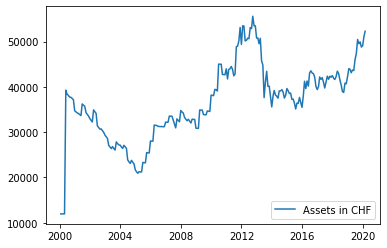

In [24]:
plt.plot(snb_balance_sheet['Assets - Gold holdings and claims from gold transactions'], label = 'Assets in CHF')
plt.legend(loc="lower right")
plt.show()

In [8]:
swiss_stock_market.head()

,SPI Swiss Performance Index - Index total (including dividend reinvestment),SPI Swiss Performance Index - Banks,SPI Swiss Performance Index - Financial services,SPI Swiss Performance Index - Insurance,SPI Swiss Performance Index - Food and beverages,SPI Swiss Performance Index - Health care,SPI Swiss Performance Index - Registered shares,SPI Swiss Performance Index - Bearer shares and participation certificates,SMI Swiss Market Index (excluding dividend reinvestment)
Date,,,,,,,,,
2000-01-04,4853.06,NaN,NaN,NaN,NaN,NaN,6284.99,4293.59,7268.1
2000-01-05,4802.81,NaN,NaN,NaN,NaN,NaN,6226.44,4237.01,7181.3
2000-01-06,4861.37,NaN,NaN,NaN,NaN,NaN,6316.39,4262.64,7280.6
2000-01-07,4971.80,NaN,NaN,NaN,NaN,NaN,6431.65,4411.83,7448.0
2000-01-10,4982.29,NaN,NaN,NaN,NaN,NaN,6431.31,4446.93,7452.8


In [32]:
date = '2020-01-01'
ytd = economic_data_switzerland.loc['2020-01-01':]

In [22]:
ytd.iloc[0].head()

SPI Swiss Performance Index - Index total (including dividend reinvestment)    12938.67
SPI Swiss Performance Index - Banks                                              822.55
SPI Swiss Performance Index - Financial services                                2338.58
SPI Swiss Performance Index - Insurance                                         2014.09
SPI Swiss Performance Index - Food and beverages                                6117.46
Name: 2020-01-03 00:00:00, dtype: float64

### Normalize Data

In [45]:
#normalize the data in order to compare the different indices
def indexize(data_series):
    index = (data_series/data_series.iloc[0])*100
    return index

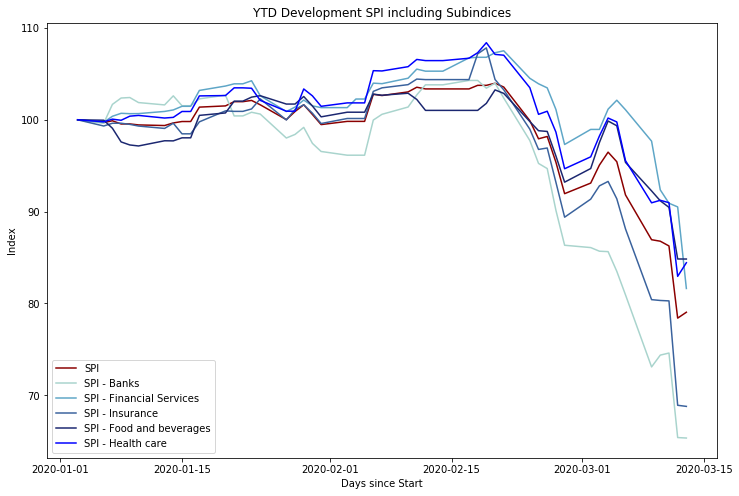

In [42]:
plt.figure(figsize = [12, 8])
#for key, val in financial_crisis.items():
#    DD = draw_down(market, val[0])
plt.plot(indexize(ytd.iloc[:,0]), label = 'SPI', color = '#8B0000')
plt.plot(indexize(ytd.iloc[:,1]), label = 'SPI - Banks', color = '#a9d4cd')
plt.plot(indexize(ytd.iloc[:,2]), label = 'SPI - Financial Services', color = '#5ea6c7')
plt.plot(indexize(ytd.iloc[:,3]), label = 'SPI - Insurance', color = '#3a629d')
plt.plot(indexize(ytd.iloc[:,4]), label = 'SPI - Food and beverages', color = '#1b2770')
plt.plot(indexize(ytd.iloc[:,5]), label = 'SPI - Health care', color = 'blue')
plt.title('YTD Development SPI including Subindices', fontweight = 'medium')
plt.xlabel('Days since Start')
plt.ylabel('Index')
plt.legend(loc="lower left")
plt.savefig('SPI.jpg', quality = 300)
plt.show()

In [102]:
data = pd.merge(economic_data, ibovespa, on = 'Date')

In [103]:
economic_data_brasil.tail(10)

,Value
Date,
2019-06-30,0.01
2019-07-31,0.10
2019-08-31,0.12
2019-09-30,-0.05
2019-10-31,0.04
2019-11-30,0.54
2019-12-31,1.22
2020-01-31,0.19
2020-02-29,0.17


In [47]:
#plt.plot(economic_data['Value'], label = "Brazil CDI")
plt.plot(data['Value'], label = 'Ibovespa')
plt.plot(data['Close'], label = 'CDI')
plt.legend()
plt.show()

NameError: name 'data' is not defined

In [46]:
#normalize the data series
def normalize(data_series):
    norm_series = (data_series - min(data_series))/(max(data_series)-min(data_series))
    return norm_series

In [105]:
close = normalize(data['Close'])
CDI = normalize(data['Value'])

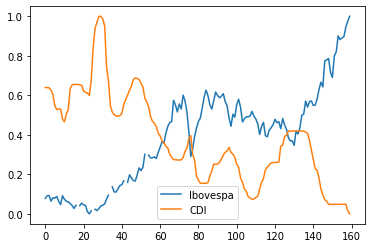

In [106]:
#plt.plot(economic_data['Value'], label = "Brazil CDI")
plt.plot(close, label = 'Ibovespa')
plt.plot(CDI, label = 'CDI')
plt.legend()
plt.show()

In [ ]:
# Call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?'

#define the parameters for the API call in order to gather the daily data for 2017
params = dict(api_key=API_KEY, start_date='2017-01-01', end_date = '2017-12-31', frequency = 'daily')

#call the API
res = requests.get(url, params = params)

#transform the data into JSON
json = res.json()